https://scikit-network.readthedocs.io/en/latest/tutorials/ranking/index.html

In [2]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_bigraph

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position


In [4]:
# PageRank
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)

In [5]:
image = visualize_graph(adjacency, position, scores=np.log(scores))
SVG(image)

https://networkx.org/documentation/stable/tutorial.html

Page rank value: {'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


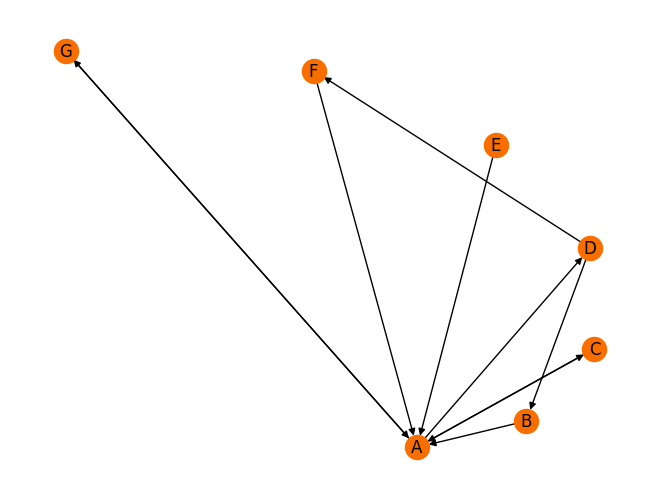

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

[G.add_node(k) for k in ["A", "B", "C", "D", "E", "F", "G"]]

G.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])
ppr1 = nx.pagerank(G)

print(f"Page rank value: { ppr1}")
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

In [ ]:
! pip install pyspark

In [6]:
# from graphframes import *
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML

import pandas as pd

# Create a Pandas DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Display the DataFrame
print(edges)


   src  dst
0  ID1  ID3
1  ID1  ID5
2  ID2  ID1
3  ID2  ID3
4  ID2  ID4
5  ID2  ID5
6  ID3  ID2
7  ID4  ID3
8  ID5  ID2
9  ID5  ID3


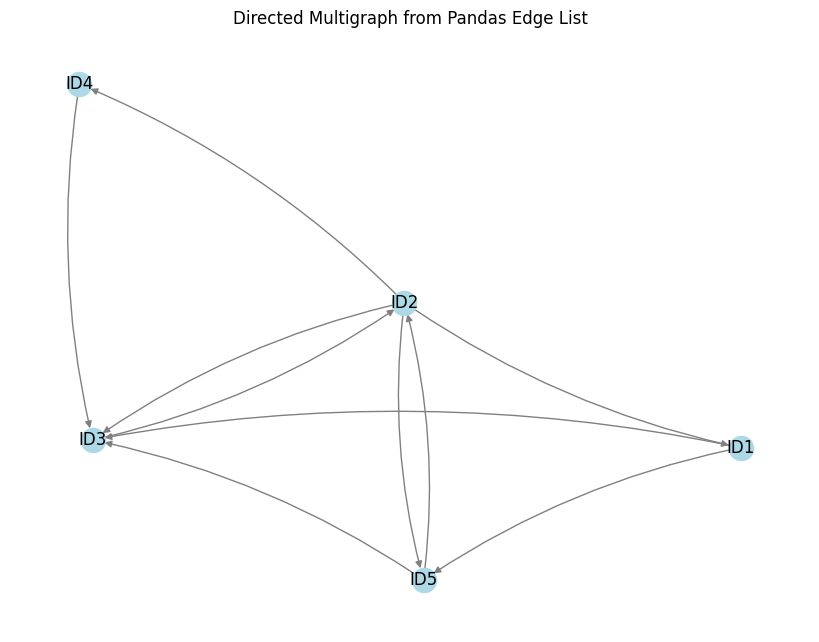

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define your edge list using Pandas
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Step 2: Create a MultiDiGraph using NetworkX
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))  # Add edges directly

# Step 3: Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, connectionstyle='arc3, rad = 0.1', node_color='lightblue', edge_color='gray')
plt.title("Directed Multigraph from Pandas Edge List")
plt.show()


In [18]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML

#Not: jupyter de randerlamıyor html kaydedip bak

# 1. Create edges DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# 2. Create a MultiDiGraph and add edges
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))

# 3. Use pyvis to visualize
nt = Network(notebook=True, directed=True, cdn_resources='remote')
nt.from_nx(G)  # Load the NetworkX graph
nt.show_buttons(filter_=['physics'])  # Optional: show physics controls
nt.show("graph.html")  # Saves and displays in Jupyter notebook


graph.html
